<div>

<center><h1 style="padding: 25px 0px; color:#d297de; font-weight: bold;">
Cancer Patients Survival Analysis</h1></center>    

</div>


# <a name="toc"></a>

<div>

<center><h3 style="padding: 5px 0px; color:#d297de; font-weight: bold; ">
Table of Contents</h3></center>
</div>

- [1. Problem statement](#Problem_Statement)
    - [1.1. Introduction](#Introduction)
    - [1.2. Dataset Features](#Dataset_Features)
- [2. Import Libraries and Data and Preprocessing](#Import_Libraries_and_Data)
- [3. Estimating Hazard Rates Using Nelson-Aalen](#Estimating_hazard_rates_using_Nelson_Aalen)
- [4. Cox Proportional Hazard Model](#Cox_proportional_hazard_model)

# <a name='Problem_Statement'></a>

<div>

<center><h3 style="padding: 5px 0px; color:#d297de; font-weight: bold;">
1. Problem Statement</h3></center>
</div>

## <a name='Introduction'></a>

<div>

<h3 style="padding: 5px 0px; color:#d297de; font-weight: bold;">
1.1. Introduction</h3>
</div>

**Introduction to Survival Analysis**

Survival analysis constitutes a set of statistical methodologies designed to determine the duration until a specific event of interest occurs. This analytical approach finds wide-ranging applications across various domains, where understanding the timing of critical events holds significance. 

**Applications:**

Survival analysis serves diverse purposes across industries:

- **Medical**: Assessing patient survival post-diagnosis of a severe ailment, duration of hospital readmission following major surgeries.
  
- **Industry**: Predicting the lifespan of Tesla car batteries.

- **Transportation**: Analyzing pedestrian waiting times post-arrival at intersections.

- **E-commerce**: Predicting the time between ad exposure and purchase.

- **Human Resources**: Anticipating employee turnover.

**Types of Events in Cancer Studies:**

Survival analysis in cancer studies typically focuses on three types of events:

1. **Relapse**: A decline in health status after a temporary improvement.
   
2. **Progression**: Gradual development towards a more advanced state, indicating health improvement.

3. **Death**: Permanent cessation of life.

**Censoring:**

In survival analysis, there exists a possibility that the event of interest may not be observed due to various reasons. Such instances are termed as censored observations. Censoring occurs due to reasons such as patients not experiencing the event within the study period or discontinuation of follow-up.

Types of censoring include:

- **Right Censoring**: Event occurrence (e.g., death).
  
- **Left Censoring**: Unobservable events, including occurrences prior to the study's commencement.
  
- **Interval Censoring**: Limited data availability within certain intervals.

**Survival and Hazard Functions:**

Survival analysis typically revolves around two key probabilities:

1. **Survival Probability**: Denoted by the survivor function \( S(t) \) (e.g., Kaplan-Meier Estimator), it represents the likelihood of an individual surviving from a specific origin time to a future time \( t \). Higher values indicate better survival prospects.

2. **Hazard Probability**: Represented by \( h(t) \), it signifies the likelihood of an individual experiencing an event at a given time \( t \). Lower values imply a lower risk of the event occurring.


## <a name='Dataset_Features'></a>

<div>

<h3 style="padding: 5px 0px; color:#d297de; font-weight: bold;">
1.2. Dataset Features</h3>
</div>

- `age`: Age in years
- `inst`: Institution code
- `meal.cal`: Calories consumed at meals
- `pat.karno`: Karnofsky performance score as rated by patient
- `ph.ecog`: ECOG performance score as rated by the physician. 0 = asymptomatic, 1 = symptomatic but completely ambulatory, 2 = in bed <50% of the day, 3 = in bed > 50% of the day but not bed bound, 4 = bed bound
- `ph.karno`: Karnofsky performance score (bad = 0; good = 100) rated by physician
- `sex`: Male = 1 Female = 2
- `status`: censoring status 1 = censored, 2 = dead
- `time`: Survival time in days
- `wt.loss`: Weight loss in last six months


# <a name='Import_Libraries_and_Data'></a>

<div>

<center><h3 style="padding: 5px 0px; color:#d297de; font-weight: bold;">
2. Import Libraries and Data and Preprocessing</h3></center>
</div>


In [5]:
!pip install lifelines

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
km = KaplanMeierFitter()

In [7]:
data = pd.read_csv('lung.csv')

In [8]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [12]:
data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


We will augment our dataset with a new column titled "dead," which will indicate whether an individual participating in our experiment is deceased or alive, based on the values in the "status" column. Specifically, if the "status" value is 1, it signifies that the individual is alive, whereas a "status" value of 2 indicates that the individual has passed away.

This additional column, "dead," will provide a clear and easily interpretable representation of the vital status of each participant in our study, facilitating further analysis and interpretation of the survival data.

In [13]:
data['death'] = data['status'].map({1:0, 2:1})

In [14]:
data.head(2)

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,death
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1


# <a name='Estimating_hazard_rates_using_Nelson_Aalen'></a>

<div>

<center><h3 style="padding: 5px 0px; color:#d297de; font-weight: bold;">
3. Estimating Hazard Rates Using Nelson-Aalen</h3></center>
</div>

**Understanding the Hazard Function:**

While survival functions provide valuable insights into the overall survival patterns within a dataset, they may not fully capture the underlying risk dynamics over time. In such cases, exploring the hazard function \( h(t) \) becomes imperative.

Unlike survival functions, which focus on the probability of survival up to a certain time point, the hazard function sheds light on the instantaneous risk of an event occurring at a specific time \( t \). However, transforming the Kaplan-Meier estimate alone doesn't facilitate the derivation of the hazard function.

By computing the Nelson-Aalen hazard function, we gain insights into the evolving risk profile within our population over time, enabling a more comprehensive understanding of the underlying dynamics driving survival outcomes.

$ \widehat{H}(t) =  \sum_{t \leq t_i} \frac{d_i}{n_i}$

Where,

$d_i$ = number of deaths at time $t_i$

$n_i$ = number of patients at the start.

In [15]:
na = NelsonAalenFitter()

In [16]:
na.fit(data['time'], event_observed = data['death'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

$H_5 = H_0 + H_5 = \frac{0}{288} + \frac{1}{288} = 0.004385$



In [17]:
na.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


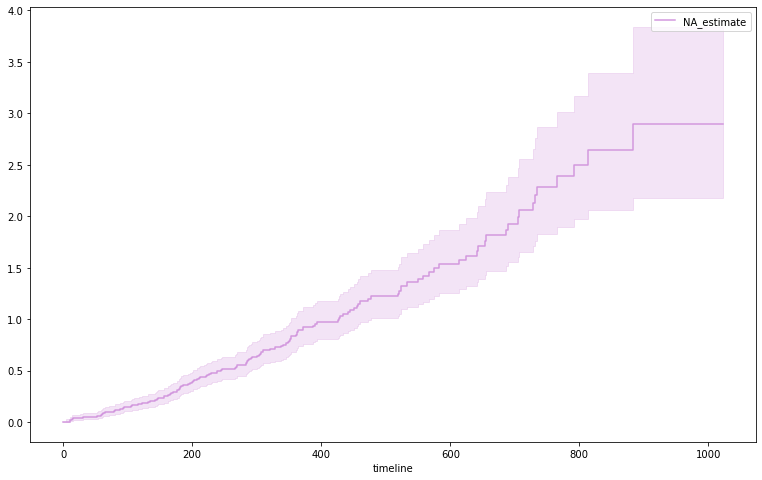

In [18]:
plt.figure(figsize=(13,8))
na.plot_cumulative_hazard(color = '#d297de');

The cumulative hazard has less obvious understanding than the survival functions, but the hazard functions are the basis of more advanced techniques in survival analysis.

We observe from the graph, the probability of a person dying increases with number of survival days

# <a name='Cox_proportional_hazard_model'></a>

<div>

<center><h3 style="padding: 5px 0px; color:#d297de; font-weight: bold; ">
4. Cox Proportional Hazard Model</h3></center>
</div>

**Understanding the Cox Proportional Hazard Model:**

The Cox proportional hazard model serves as a fundamental regression tool widely utilized in medical research to elucidate the relationship between the survival time of subjects and various predictor variables. Essentially, it enables us to discern how factors such as age, sex, weight, and height influence an individual's length of survival.

In contrast to the methodologies discussed earlier, such as Kaplan-Meier, Nelson-Aalen, and Log-Rank Test, which primarily focused on analyzing one variable at a time, the Cox proportional hazard model offers the advantage of considering multiple predictor variables simultaneously. Moreover, it accommodates both categorical and quantitative predictor variables, making it a versatile choice for analyzing diverse datasets.

The necessity for employing the Cox proportional hazard model arises from the complexity of medical research scenarios, where several factors contribute to diagnosing a person's health or predicting their survival time. For instance, researchers often examine variables such as sex, age, blood pressure, and blood sugar levels to discern significant differences among various groups. By leveraging Cox regression analysis, researchers can determine the coefficients associated with different parameters, thereby elucidating the factors that exert the most substantial impact on survival outcomes.

At its core, the Cox proportional hazard method aims to assess how different factors within a dataset influence the occurrence of the event of interest. Through this method, researchers gain insights into the nuanced interplay between predictor variables and the event under investigation, facilitating a deeper understanding of the underlying mechanisms governing survival outcomes.
Hazard function:

$h(t) = h_0(t)* exp(b_1 x_1 + b_2 x_2 + ... + b_n x_n)$

where,

$h(t)$ = hazard function

$b_1, b_2, ..., b_n$ = measures the impact of covariates

$x_1, x_2, ..., x_n$ = covariates

$t$ = survival time

The values exp(bi) is called the hazard ratio (HR). The HR greater than 1 indicates that as the value of ith covariate increases, the event hazard increases, and thus the duration of survival decreases.

$HR < 1 \rightarrow Reduction\ in\ the\ Hazard$

$HR = 1 \rightarrow No\ Effect$

$HR > 1 \rightarrow Increase\ in\ the\ Hazard$

In [20]:
data_c = data[['time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'death']]

In [21]:
data_c.isnull().sum()

time          0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
death         0
dtype: int64

In [23]:
data_c = data_c.dropna(subset=['time', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'death'])

In [24]:
data_c.shape

(168, 9)

In [25]:
cph = CoxPHFitter()

cph.fit(data_c, 'time', event_col='death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 168 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 168
number of events observed = 121
   partial log-likelihood = -498.75
         time fit was run = 2024-04-17 19:22:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.58       0.20            -0.94            -0.16                 0.39                 0.85
ph.ecog     0.73       2.08       0.22             0.30             1.17                 1.35                 3.23
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.92   0.36       1.48
sex           0.00 -2.74   0.01       7.36
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.54   0.12       3.02
meal.cal      0.00  0.13   0.90       0.16
wt.loss       0.00 -1.84   0.07       3.94
---
Concordance = 0.65
Partial AIC = 1011.50
log-likelihood ratio test = 28.33 on 7 df
-log2(p) of ll-ratio test = 12.35

Observing the p-values associated with various parameters, it's crucial to highlight that a p-value less than 0.05 is conventionally deemed significant. Upon examination, it's apparent that the p-values for "sex" and "ph.ecog" are both below this threshold. Consequently, we can assert that grouping our data based on these parameters is warranted.

The Hazard Ratio (HR), often denoted as exp(bi), provides further insight into the relationship between predictor variables and the event of interest. For instance, in the case of "sex," where the p-value is 0.01 and the HR is 0.57, a robust association emerges between patients' sex and a decreased risk of death. To elaborate, holding other covariates constant, being female (sex=2) diminishes the hazard by 42%, indicating higher survival chances among females. This inference aligns with the graphical analysis conducted in the preceding section.

Similarly, for "ph.ecog," where the p-value is less than 0.005 and the HR is 2.09, a significant correlation emerges between the "ph.ecog" value and an increased risk of death. Holding other covariates constant, a higher "ph.ecog" value correlates with poorer survival outcomes, with individuals exhibiting higher "ph.ecog" values facing a 109% higher risk of death. Consequently, efforts by medical professionals to mitigate "ph.ecog" values through appropriate medication interventions are imperative.

Contrastingly, the HR for "Age" stands at 1.01, indicating a mere 1% increase for the higher age group. Consequently, we can infer that there exists no significant disparity between different age groups in terms of survival outcomes.

Check which factor affects the most from the graph:

You can clearly see that ph.ecog and sex variables have significant differences.

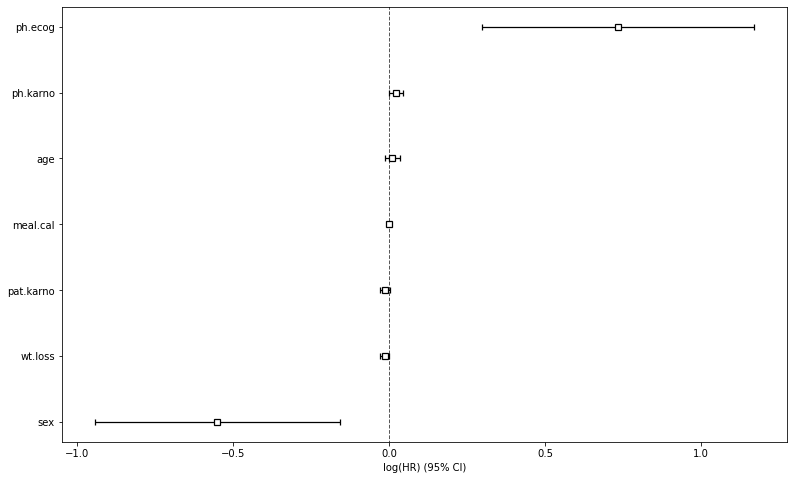

In [26]:
plt.figure(figsize=(13,8))
cph.plot();

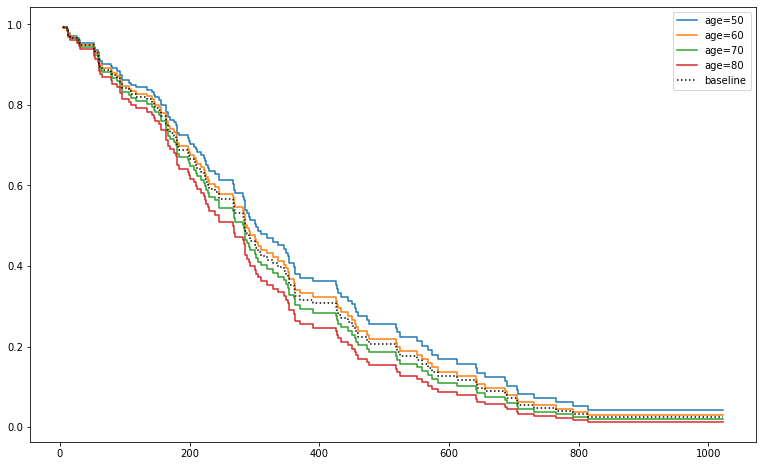

In [30]:
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [50, 60, 70, 80], figsize=(13,8));

In this analysis, we employed the plot_partial_effects_on_outcome() method to visualize the variation in survival probabilities among different age groups, specifically focusing on individuals aged 50, 60, 70, and 80 years, relative to the baseline function. The results unequivocally illustrate that younger patients exhibit notably higher survival probabilities at any given point in time compared to their older counterparts.

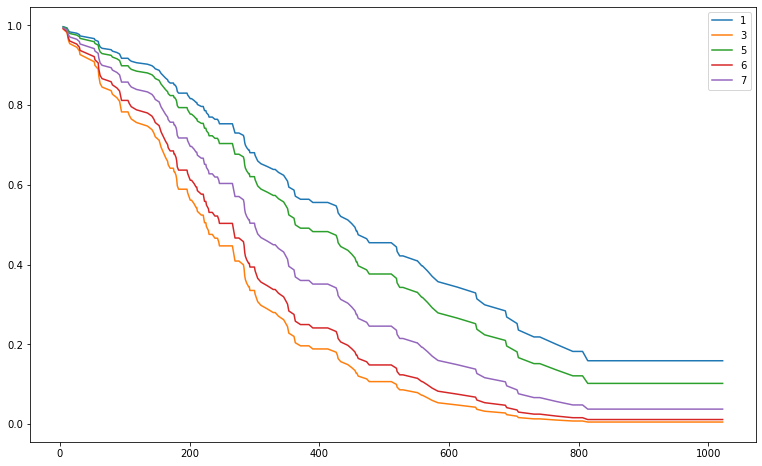

In [31]:
# Plot the survival function :
d_data = data_c.iloc[0:5,:]
cph.predict_survival_function(d_data).plot(figsize=(13,8));

In this plot depicting the survival probabilities for individuals within our dataset, it's evident that person-1 possesses the highest likelihood of survival, while person-3 faces the lowest chances of survival. Upon closer examination of the primary data, it becomes apparent that person-3 exhibits a higher "ph.ecog" value, indicating a poorer performance status.

Furthermore, an intriguing observation emerges regarding person-5, whose survival probability appears comparatively lower despite being alive. This discrepancy can be attributed to the individual's elevated "ph.ecog" value, suggesting a compromised health status that adversely impacts their survival prospects, despite their current vitality.

In [32]:
data_c['ph.ecog'].unique()

array([0., 1., 2., 3.])

In [33]:
data_c['ph.ecog'].value_counts()

1.0    81
0.0    47
2.0    39
3.0     1
Name: ph.ecog, dtype: int64

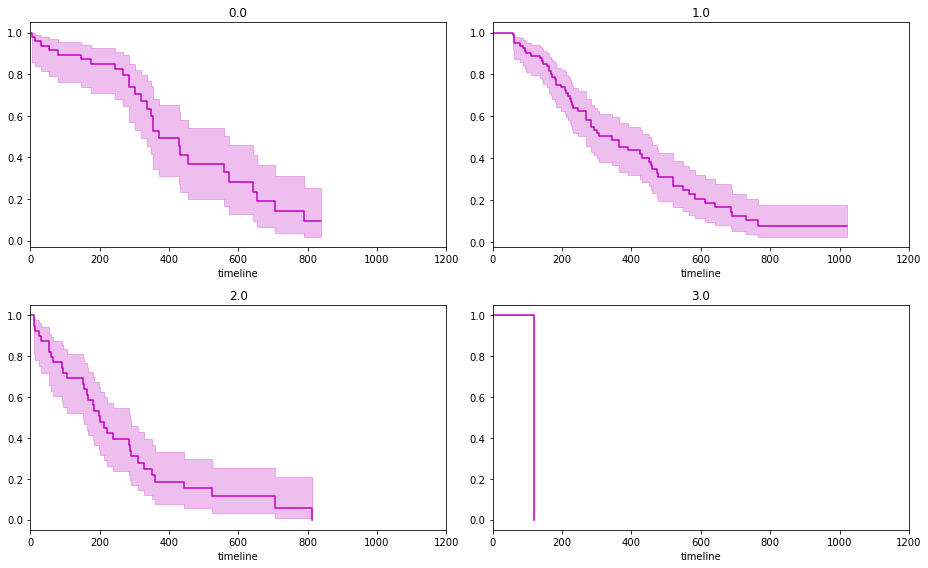

In [40]:
ecog_types = data_c.sort_values(by = ['ph.ecog'])['ph.ecog'].unique()
for i, ecog_types in enumerate(ecog_types):
  ax = plt.subplot(2, 2, i+1)
  ix = data_c['ph.ecog'] == ecog_types
  km.fit(data_c['time'][ix], data_c['death'][ix], label = ecog_types)
  km.plot_survival_function(ax = ax, legend = False, figsize=(13,8),color='m')
  plt.title(ecog_types)
  plt.xlim(0, 1200)
plt.tight_layout();

Higher ph.ecog foe patients usually means lower lifetime.